# Fietspaden in Brussel

## Over de data

Bron: https://opendata.brussel.be/

### Deze data bevat

* zowel fietspaden als andere fietsinfrastructuur (busbanen, parken, voetgangerszone),

> Artikel 74. Overlangse markeringen die een fietspad aanduiden
> Het deel van de openbare weg dat afgebakend is door twee evenwijdige witte onderbroken strepen en dat niet breed genoeg is voor het autoverkeer, is een fietspad.

* zowel  gewest- als gemeentewegen.

* Waar er fietspaden aangelegd zijn aan beide kanten van de weg zijn deze dubbel opgenomen.

### Deze data bevat niet

* het jaar van aanleg,
* geschrapte fietspaden.

> Tegelijk schrapte het stadsbestuur ook bijna 2.391 meter fietspad, onder meer op de Adolphe Maxlaan en de Zuidstraat. (https://www.bruzz.be/mobiliteit/nieuwe-fietspaden-bestaan-vooral-ampes-fantasie-2018-05-11)

In [1]:
%pylab inline
from functools import partial
import geopandas
import pyproj
from shapely.geometry import shape
from shapely.ops import transform
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = 200

In [3]:
wgs84 = 'EPSG:4326'
lambert72 = 'EPSG:31370'

In [4]:
project = partial(
    pyproj.transform,
    pyproj.Proj(init=wgs84),
    pyproj.Proj(init=lambert72))

In [5]:
def geojson_to_df(geojson_file):
    data = geopandas.read_file(geojson_file).assign(
    lambert72 = lambda df: df['geometry'].apply(partial(transform, project)),
    lengte = lambda df: df['lambert72'].apply(lambda geom: geom.length),  
    naam = lambda df: df['name'].str.extract('(.*?) ?- .*', expand=False))
    return data

In [6]:
data = {}
data['verhoogde_fietspaden'] = geojson_to_df('data/fietsvelo-verhoogde-fietspaden-pistes-cyclables-surelevees.geojson')
data['gemarkeerde_fietspaden'] = geojson_to_df('data/fietsvelo-gemarkeerde-fietspaden-pistes-cyclables-marquees.geojson')
data['voetgangerszone'] = geojson_to_df('data/fietsvelo-voetgangerszone-fietszone-pietonnier-zone-cyclable.geojson')
data['parken'] = geojson_to_df('data/fietsvelo-fietspaden-in-park-bandes-cyclables-dans-les-parcs.geojson')
data['busbanen'] = geojson_to_df('data/fietsvelo-busbaan.geojson')

In [7]:
overview = pd.DataFrame({key: [data[key]['lengte'].sum() / 1000] for key in data}).transpose().rename(columns={0: 'lengte [km]'})

## Totaal fietspaden

67,9 km

In [8]:
overview.loc['verhoogde_fietspaden', 'lengte [km]'] + overview.loc['gemarkeerde_fietspaden', 'lengte [km]']

67.941248012101

## Totalen voor alle data

In [9]:
overview

,lengte [km]
verhoogde_fietspaden,11.960545
gemarkeerde_fietspaden,55.980704
voetgangerszone,10.077363
parken,5.753755
busbanen,6.724383


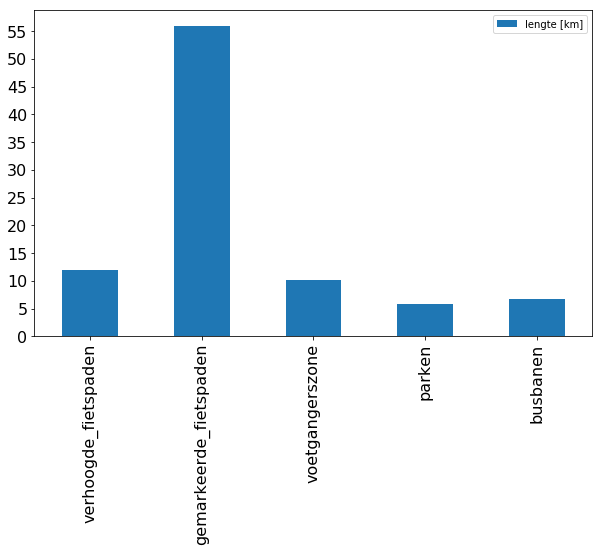

In [10]:
overview.plot(kind='bar', figsize=(10,6), fontsize=16, yticks=range(0, 60, 5))

## Details

## 1. Fietspaden

### 1.1 Verhoogde fietspaden

In [11]:
data['verhoogde_fietspaden'][['naam', 'lengte']]

,naam,lengte
0,Wetstraat,1099.810390
1,Nerviërslaan,583.665742
2,Renaissancelaan,534.173803
3,Karel de Grotelaan,180.847870
4,Wetstraat,1103.060776
5,Romeinsesteenweg,220.162038
6,Keizerslaan,50.674464
7,Groendreef,929.301074
8,Nerviërslaan,585.969798
9,Havenlaan,1615.169240


#### Totaal verhoogde fietspaden

12,0 km

In [12]:
data['verhoogde_fietspaden']['lengte'].sum() / 1000

11.960544506779845

### 1.2 Gemarkeerde fietspaden

In [13]:
data['gemarkeerde_fietspaden'][['naam', 'lengte']]

,naam,lengte
0,Denneboslaan,814.309980
1,Mechelsestraat,117.470095
2,Pachecolaan,389.366805
3,Visverkopersstraat - Gemarkeerd fietspad,84.000653
4,Bruynstraat,325.677309
5,Bruynstraat,315.220957
6,Boudewijnlaan,29.241876
7,Naamsestraat,388.854288
8,Bockstaellaan,672.948926
9,Stévinstraat,88.953339


#### Totaal gemarkeerde fietspaden

56,0 km

In [14]:
data['gemarkeerde_fietspaden']['lengte'].sum() / 1000

55.98070350532116

## 2. Andere infrastructuur

### 2.1 Busbanen

In [15]:
data['busbanen'][['naam', 'lengte']]

,naam,lengte
0,Kunstenaarstraat,173.801047
1,Treurenberg,136.913912
2,Bockstaellaan,363.652959
3,Leuvensesteenweg,205.143575
4,Avenue de Boitsfort,641.572055
5,Sainctelettesquare,134.629311
6,Sainctelettesquare,77.128415
7,Sainctelettesquare,75.453672
8,\tBusbaan/Fietsstrook,459.366474
9,Lemonnierlaan,653.771080


#### Totaal busbanen

6,7 km

In [16]:
data['busbanen']['lengte'].sum() / 1000

6.724383253944849

### 2.2 Voetgangerszone

In [17]:
data['voetgangerszone'][['naam', 'lengte']]

,naam,lengte
0,Eikstraat,147.070547
1,Kiekenmarkt,42.247658
2,Steenstraat,252.151589
3,NaN,62.264045
4,Fontainasplein,38.974111
5,St-J. Nepucemusstraat,37.360719
6,Eikstraat,147.120725
7,Voetgangerszone,90.813564
8,Voetgangerszone,97.323034
9,Boterstraat,106.682355


#### Totaal voetgangerszone

10,1 km

In [18]:
data['voetgangerszone']['lengte'].sum() / 1000

10.077363035811615

### 2.3 Parken

In [19]:
data['parken'][['naam', 'lengte']]

,naam,lengte
0,Bremlaan,580.673296
1,Parc Leopold,430.430630
2,Schuitenkaai,49.650846
3,Derbydreef,511.257917
4,Schuitenkaai,194.869267
5,Schuitenkaai,194.823667
6,Warandepark,319.213759
7,Derbydreef,504.032285
8,Bremlaan,582.718645
9,Ter Kameren Bos,802.139620


#### Totaal parken

5,6 km

In [20]:
data['parken']['lengte'].sum() / 1000

5.753755382339027